YOLOv5  2023-5-30 Python-3.7.12 torch-1.13.1+cpu CPU

Fusing layers... 
Model summary: 206 layers, 3089188 parameters, 0 gradients, 4.2 GFLOPs
Adding AutoShape... 


预测的结果是 ['idcard_z']


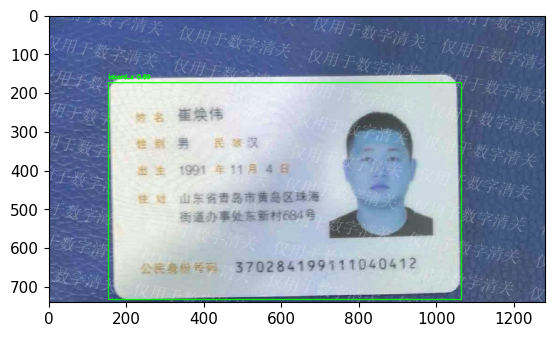

In [7]:
%matplotlib inline
import cv2
import torch
import matplotlib.pyplot as plt

# model = torch.load('ultralytics/yolov5', 'custom', path='./best.pt', force_reload=True)
model = torch.hub.load('D:\\code1\\yolov5-master\\yolov5-master', 'custom', path='./best.pt', source='local')  # local repo
#print(model)
# 读取图像
img = cv2.imread('../images/zm.jpg')
# 进行预测
results = model(img)
resultLabel=[]
# 解析预测结果
for result in results.xyxy[0]:
    x1, y1, x2, y2, conf, cls = result.tolist()
    if conf > 0.5:
        # 绘制边框和标签
        cv2.rectangle(img, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
        cv2.putText(img, f"{model.names[int(cls)]} {conf:.2f}", (int(x1), int(y1 - 10)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        resultLabel.append(model.names[int(cls)])
# 显示图像
print("预测的结果是",resultLabel)
plt.imshow(img)
plt.show()